# Assignment: Airbnb Rental Price Prediction


In [126]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

## Part A: Data Understanding & Cleaning


### 1. Load the dataset in Pandas and explore it (.head(), .info(), .describe()).

In [4]:
df = pd.read_csv(r"C:\Users\olumi\Desktop\Training\AB_NYC_2019.csv")

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.shape

(48895, 16)

### 2. Identify and handle missing values.


In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### To handle the missing number would be based on different scenarios that surround the missing data. If it is categorical, "0" or "unknown" can be used to replaced the missing data provided the missing number is much but if the missing data is small, we can decide to drop it. In terms of numerical, statistical computation can be done on this or backward fill or upward fill can as well be done; I can as well ask the ML to do the prediction by importing scikit learn Inputer Library.

### For the "name" column, I will be replacing the column with "0".

In [10]:
# df.name.fillna(df.name.mode()[0], inplace =True)

df['name']= df['name'].fillna(df['name'].mode()[0])  # most frequent


### for the "host_name", missing data would be replaced by "0" as well

In [11]:
# df["host_name"].fillna(df["host_name"].mode()[0], inplace = True)

df["host_name"] = df["host_name"].fillna(df["host_name"].mode()[0])


In [12]:
df.shape


(48895, 16)

### for the missing date reveiws, backward or forward filled would be used to fill the missing data, the missing dat is much and I can't afford to drop all the columns, for this reason, the missing data needs to be dealt with accordingly.

In [13]:
# df["last_review"].fillna(df["last_review"].ffill, inplace =True)
df["last_review"].fillna(df["last_review"].ffill(), inplace=True)
df["reviews_per_month"].fillna(df["reviews_per_month"].ffill(), inplace = True)

In [14]:
df.isnull().sum()   #checking the missing data, all done.

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 3. Remove or treat outliers in the price column (hint: listings with price = 0 or extremely high values).

##### My outliers would be prices that are out of boundaries/limits that might afect my analysis. For examples, the 01% and 0.99% cap. These needs to be discovered and capped out or dropped.

In [15]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [16]:
# find the pricve thatv are 0
print((df["price"] == 0).sum())

11


In [17]:
# high quartile like 0.99
high_threshold = (df["price"].quantile(0.99))

In [18]:
df[df["price"] > high_threshold].head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,2019-07-02,1.37,1,257


In [19]:
print((df["price"] > high_threshold).sum())


474


### For the Outliers, I will need to drop the high threshold and the zeros because they are not up to 0.9 percent

In [20]:
# Remove rows where price is 0 or above high_threshold
df_cleaned = df[(df["price"] != 0) & (df["price"] <= high_threshold)]

In [21]:
df.shape




(48895, 16)

In [22]:
df_cleaned.shape

(48410, 16)

### 4. Encode categorical variables like neighbourhood_group and room_type.

#### Encoding is the method implies to code variable. For integer variable, Label encoding is better, for nominal variblle like room_tyoe and neighbourhood_group, ONE HOT ENCODING is suitable i.e Dummy variables. But I will prefer LABEL ENCODING COS i want integer variables or binary variable

In [23]:
le = LabelEncoder()
df_cleaned[["neighbourhood_group", "room_type"]] = df_cleaned[["neighbourhood_group", "room_type"]].apply(lambda col: le.fit_transform(col))

In [24]:
df_cleaned.shape

(48410, 16)

In [25]:
df_cleaned.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355


## Part B: Exploratory Data Analysis (EDA)


### 1. Create a histogram of prices – does the distribution look normal or skewed?


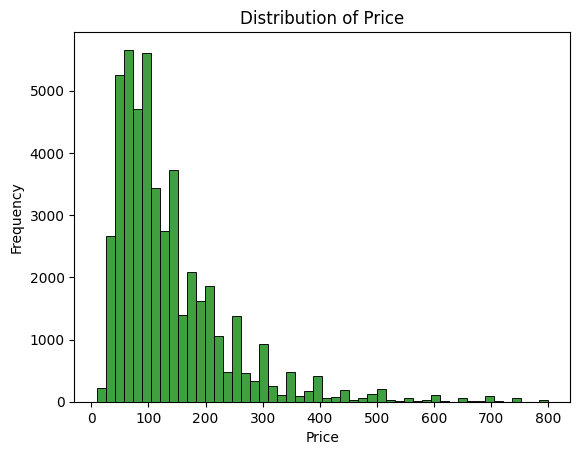

In [26]:
sns.histplot(df_cleaned["price"], color ="green", bins =50)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#### This is Positively skewed as it is skewed to the right. It means, most of the prices are clustered at the lower end, though we have some pricess at the higher end also

### 2. Show the top 10 neighbourhoods with the highest average prices.


In [27]:
neighbourhood_10 = df_cleaned.groupby("neighbourhood")["price"].mean().sort_values(ascending =False)


In [28]:
print(neighbourhood_10.head(10))

neighbourhood
Woodrow               700.000000
Tribeca               295.647436
NoHo                  276.246753
Neponsit              274.666667
Flatiron District     258.162162
Midtown               255.751830
Willowbrook           249.000000
SoHo                  229.833828
West Village          224.897019
Financial District    215.745257
Name: price, dtype: float64


### 3. Use a heatmap (correlation matrix) to check relationships between numerical features.

In [29]:
df_num = df_cleaned.select_dtypes(include=['float64', 'int64'])

In [30]:
df_num.head(1)

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,1,40.64749,-73.97237,1,149,1,9,0.21,6,365


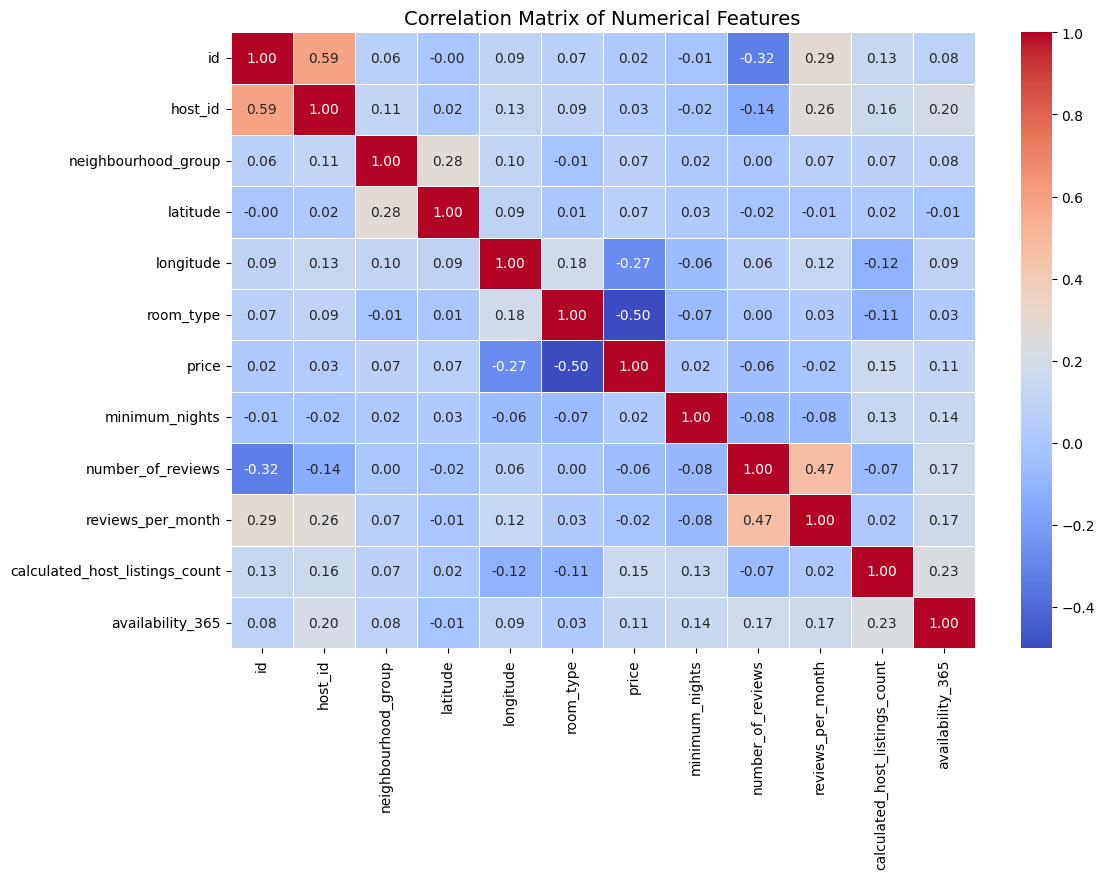

In [31]:
corr_matrix = df_num.corr()
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

### 4. Plot average price vs room_type using a bar chart.


#### bar plot after cleaning DF

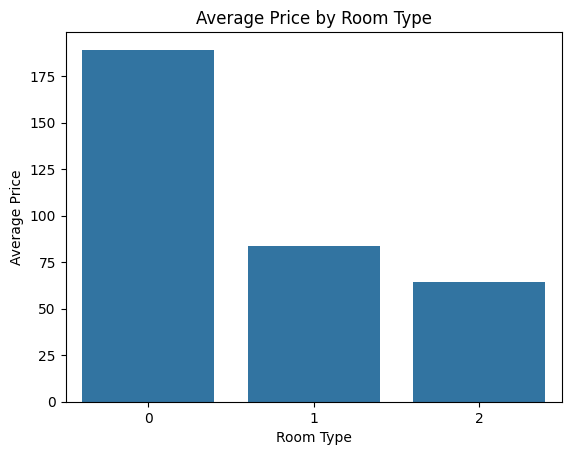

In [32]:
room_per_price = df_cleaned.groupby('room_type')['price'].mean().reset_index()

sns.barplot(x='room_type', y='price', data=room_per_price)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


###  Barplot before cleaning DF

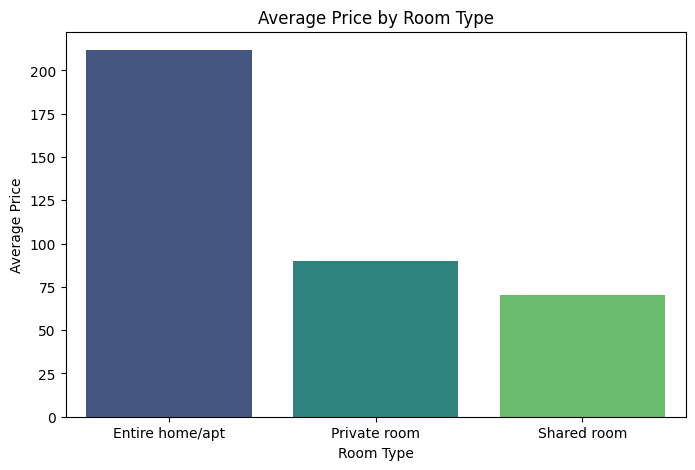

In [33]:

# Make sure to create a proper DataFrame
room_per_price = df.groupby('room_type')['price'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='room_type', y='price', data=room_per_price, palette='viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


# Part C: Feature Engineering & Scaling

### 1. Select useful features (location, room type, reviews, availability, etc.) for prediction.

In [34]:
features = [
    "latitude", "longitude", "price",
    "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"
]

### 2. Apply different scaling methods (StandardScaler, MinMaxScaler) and compare their effect.


### Apply standardscaler, the mnean is o and the sd is 1

In [35]:
scaler_ss = StandardScaler()

In [36]:
df_cleaned_ss = df_cleaned.copy()

In [37]:
df_cleaned_ss[features] = scaler_ss.fit_transform(df_cleaned[features])


In [38]:
(df_cleaned_ss[features]).sum()

latitude                         -2.116224e-09
longitude                        -1.536046e-08
price                            -2.614797e-12
minimum_nights                   -1.364242e-12
number_of_reviews                 0.000000e+00
reviews_per_month                -9.094947e-13
calculated_host_listings_count   -4.547474e-13
availability_365                  4.547474e-13
dtype: float64

#### N.B : Values are centered around 0, can handle outliers moderately. Good for models assuming normal distribution.

### Apply MinMaxScaler

In [39]:
scaler_mm = MinMaxScaler()
df_clean_mm = df_cleaned.copy()
df_clean_mm[features] = scaler_mm.fit_transform(df_cleaned[features])

In [40]:
(df_clean_mm[features]).head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.357393,0.511921,0.176172,0.000000,0.014308,0.003419,0.015337,1.000000
1,0.614199,0.490469,0.272497,0.000000,0.071542,0.006326,0.003067,0.972603
2,0.748252,0.569257,0.177440,0.001601,0.000000,0.006326,0.000000,1.000000
3,0.448496,0.535649,0.100127,0.000000,0.429253,0.079159,0.000000,0.531507
4,0.722820,0.565324,0.088720,0.007206,0.014308,0.001539,0.000000,0.000000


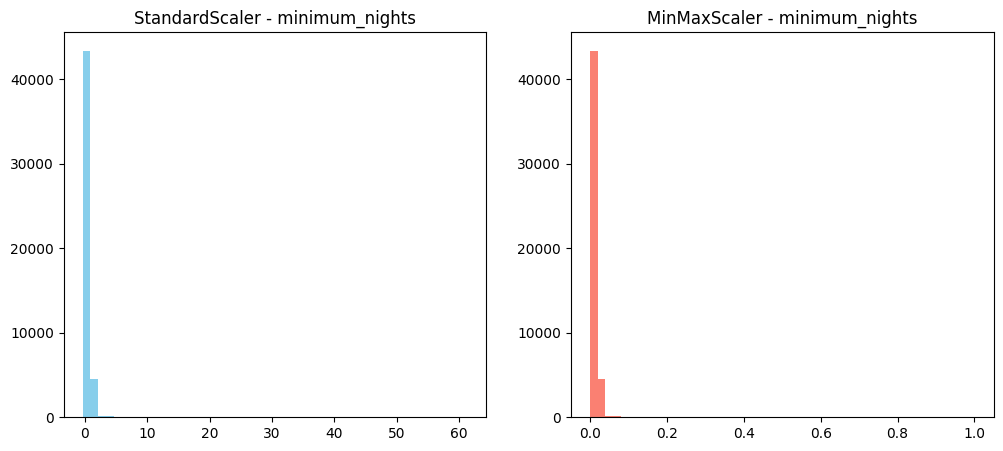

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df_cleaned_ss['minimum_nights'], bins=50, color='skyblue')
plt.title('StandardScaler - minimum_nights')

plt.subplot(1,2,2)
plt.hist(df_clean_mm['minimum_nights'], bins=50, color='salmon')
plt.title('MinMaxScaler - minimum_nights')

plt.show()

# Part D: Model Training & Evaluation


### 1. Split the dataset into train/test sets (e.g., 80/20).


In [42]:
features

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [43]:
target = "price"

In [44]:
X = df_cleaned_ss[features] # scaled features
y = df_cleaned_ss[target] # target

In [45]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state = 42)

In [46]:
X_train.shape

(38728, 8)

In [47]:
X_test.shape

(9682, 8)

In [48]:
y_train.shape

(38728,)

In [49]:
y_test.shape

(9682,)

### 2. Train and evaluate the following regression models:

#### a. Linear Regression

In [50]:
#Import and trein the splitted datas
Lin_reg = LinearRegression()

In [51]:
#train the train data , that is, the model
Lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
# MAKE prediction about the test, y on X_test. the features of X
y_pred = Lin_reg.predict(X_test)

#### a1) Evaluate Model Performance

In [53]:
#Mean Absolute Error (MAE))

In [54]:
# Comparing the Actual Y_test with the predicted Y USING MAE
MAE_lr = mean_absolute_error(y_test, y_pred)


In [55]:
# for mean square error
mse_lr = mean_squared_error(y_test, y_pred)


In [56]:
#root measn square, that is the square root of mea
rmse_lr =np.sqrt(mse_lr)

In [57]:
#r square error
r2_lr = r2_score(y_test, y_pred)

#### Visua;ize the actual price vs predicted prices, Linear regression

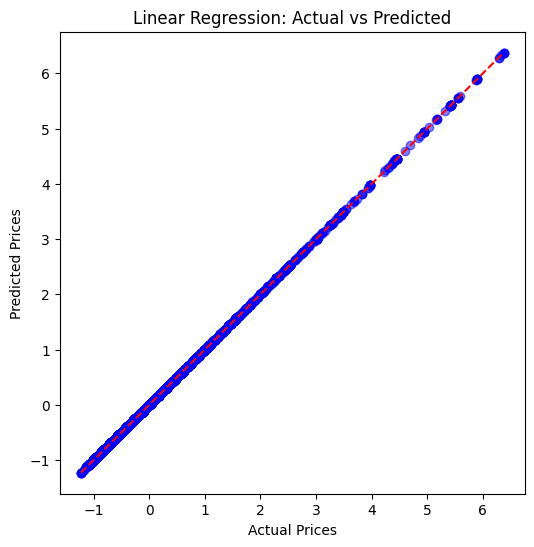

In [58]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

### b. Ridge & Lasso Regression
##### Ridge and Lasso is a form of regression with regularization to avoid overfitting

#### b1) ridge 

In [59]:
ridge = Ridge(alpha = 1.0)  #strenght of thr regularization

In [60]:
ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [61]:
y_predict_rigde = ridge.predict(X_test)

In [62]:
# Model Evaluation
rigde_mae = mean_absolute_error(y_test, y_predict_rigde)
rigde_mae

1.9023304774373423e-05

In [63]:
rigde_mse = mean_squared_error(y_test, y_predict_rigde)
rigde_mse

7.553109133332254e-10

In [64]:
rigde_r2 = r2_score(y_test, y_predict_rigde)
rigde_r2

0.9999999992524522

#### b2) For Lasso

In [65]:
lasso = Lasso(alpha = 0.1) # choose small range for Lasso to avoid kiling all features

In [66]:
lasso.fit(X_train, y_train)  # building the model

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [67]:
y_pred_lasso = lasso.predict(X_test) #the predicted y test, the price on X test

In [68]:
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print(f"M A E: {lasso_mae}")

M A E: 0.0714942891703195


In [69]:
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print(f" MSE : {lasso_mse}")

 MSE : 0.010158767722424914


In [70]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"r_square : {lasso_r2}")

r_square : 0.9899456447341031


### c Decision Tree Regressor
#### Unlike Linear and Lasso, Dt it doesnt observe linesr relationships. But it splits data into regions and observe their averages

In [71]:
# to avoid overfitting, we have to create limit depths

dt = DecisionTreeRegressor(max_depth = 5, random_state = 42)

In [72]:
#train the model
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [73]:
y_pred_dt = dt.predict(X_test)

#### calculating the errors

In [74]:
dt_mae= mean_absolute_error(y_test, y_pred_dt)
dt_mae

0.027633279241610593

In [75]:
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mse

0.0013822827680467886

In [76]:
dt_r2 = r2_score (y_test, y_pred_dt)

In [77]:
dt_r2

0.9986319244215821

##### Visualize the tree

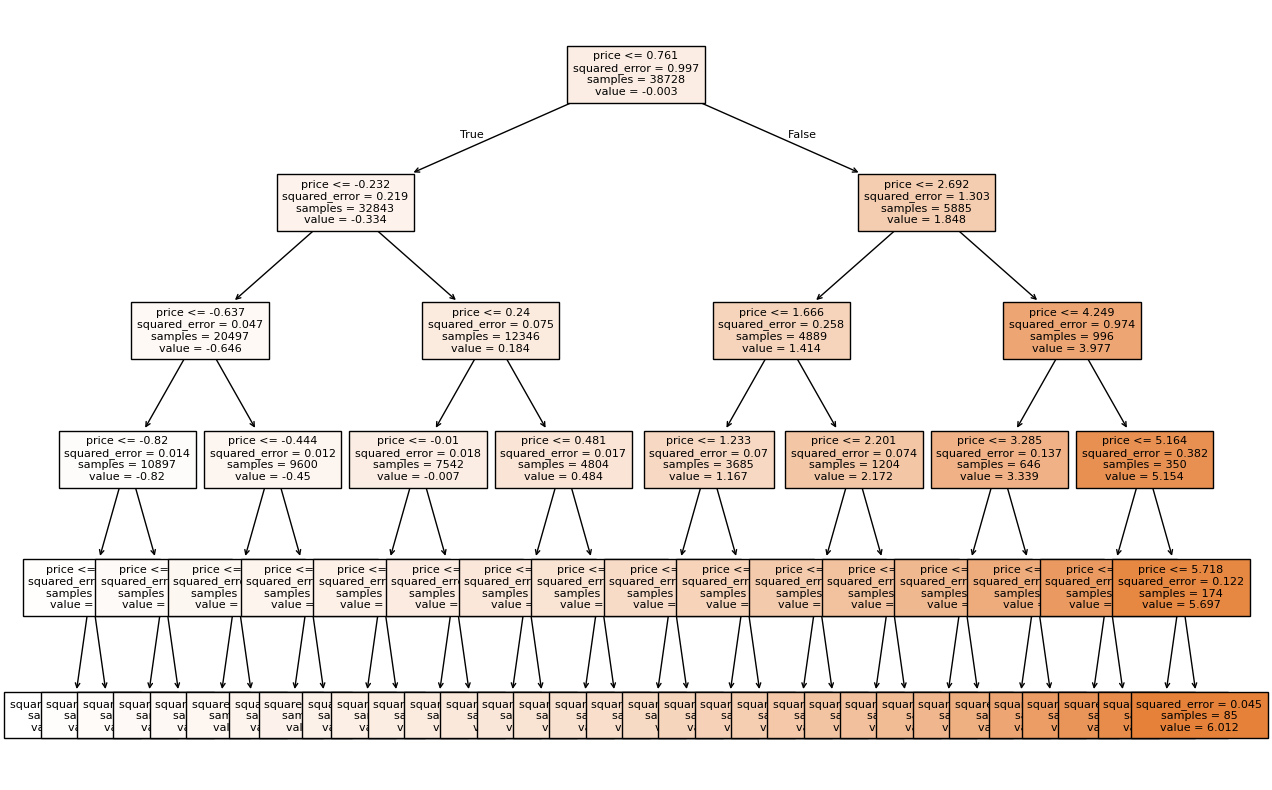

In [78]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=features, filled=True, fontsize=8)
plt.show()

### c. Random Forest Regressor


##### Random forest is an ENSEMBE model that builds many decision trees and average their predictions. Reducing overfitting and improving accuracy, comparing to decision tree

In [79]:
rf = RandomForestRegressor(n_estimators =100 , max_depth = 10, random_state = 42)  #n_estimator equals to number of trees

In [80]:
rf.fit(X_train, y_train) #train the model

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
y_pred_rf = rf.predict(X_test)   #the predicted y test

#### Evaluate the model

In [82]:
rf_mae = mean_absolute_error(y_test, y_pred_rf)

In [83]:
rf_mse = mean_squared_error(y_test, y_pred_rf)

In [84]:
rf_r2 = r2_score(y_test, y_pred_rf)

### d. Support Vector Regressor (SVR)


#### SVR is a regression  model builds on SVM. it avoids error and builds its model within a tube in order to robust or escape outliers

In [85]:
#svr is sensitive to scaling
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # kernel can be 'linear', 'poly', or 'rbf'


In [86]:
svr.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [87]:
y_pred_svr = svr.predict(X_test)


#### Evaulting the model usic metrics

In [88]:
svr_mae = mean_absolute_error(y_test, y_pred_svr)

In [89]:
svr_mse= mean_squared_error(y_test, y_pred_svr)

In [90]:
svr_r2 =r2_score(y_test, y_pred_svr) 


#### d. Gradient Boosting / XGBoost


#### they both builds trees sequenttially. where each new tree correct the errors of the previous tree. XGBOOST is an optimised, faster, regularized fashion of Gradient boost

In [91]:
# Train the model, GBR
gbr = GradientBoostingRegressor(n_estimators = 200 , learning_rate = 0.1, max_depth = 3, random_state = 42)

In [92]:
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [93]:
y_pred_gbr = gbr.predict(X_test)

#### Error Evaluation using metrics

In [94]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

In [95]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

In [96]:
r2_gbr = r2_score(y_test, y_pred_gbr)
r2_gbr

0.999983244636421

#### d2) XGBOOST

In [97]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

In [98]:
#build the model
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [99]:
y_pred_xgb = xgb.predict(X_test)

#### For the evaluation

In [100]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [101]:
mse_xgb =mean_squared_error(y_test, y_pred_xgb)

In [102]:
r2_xgb = r2_score(y_test, y_pred_xgb)

# Part E: Comparison & Conclusion


#### 1. Create a comparison table of model performance (MAE, RMSE, R²).


In [112]:
results ={}

In [113]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" :  Ridge(alpha = 1.0),
    "Lasso Regression" :  Lasso(alpha = 0.1),
    "Decision Tree" : DecisionTreeRegressor(max_depth = 5, random_state = 42),
    "Random Forest" : RandomForestRegressor(n_estimators =100 , max_depth = 10, random_state = 42),
    "SVR" : SVR(kernel='rbf', C=100, epsilon=0.1),
    "Gradient Boosting" : GradientBoostingRegressor(n_estimators = 200 , learning_rate = 0.1, max_depth = 3, random_state = 42),
    "XGBoost" : XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
}
    

In [123]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    

    results[name] = {"MAE": mae, "MSE": mse, "RMSE" : rmse ,"R²": r2}

# convert to a dataframe
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)

In [124]:
print("📊 Model Performance Comparison:\n")
print(results_df)

📊 Model Performance Comparison:

                            MAE           MSE          RMSE        R²
Linear Regression  7.040798e-16  9.690608e-31  9.844088e-16  1.000000
Ridge Regression   1.902330e-05  7.553109e-10  2.748292e-05  1.000000
Random Forest      9.158842e-05  1.167772e-06  1.080635e-03  0.999999
Gradient Boosting  1.767493e-03  1.692936e-05  4.114531e-03  0.999983
Decision Tree      2.763328e-02  1.382283e-03  3.717906e-02  0.998632
XGBoost            9.521393e-03  1.445101e-03  3.801448e-02  0.998570
SVR                4.767928e-02  6.862640e-03  8.284105e-02  0.993208
Lasso Regression   7.149429e-02  1.015877e-02  1.007907e-01  0.989946


#### 2. Write a short conclusion:


### a. Which model performed best?


#### Note, For MAE, MSE, RMSE; it is better to be lower in all these evaluator BUT R_square, if closer to 1 is the best.

#### in real world analysus, we rarely get get R_squared equals or close to 1. If they do, there might be a data leakage or the data is so simple.

#### Conclusion: the model that perform best is LINEAR REGRESSION AND RIDGE REGRESSION because the MAE/MSE/RMSE is so tiny and the R2 is equals to 1. As earlier stated, in the real world analysis, this might not be possible, and if it happens, I should just note the two situations stated earlier.

#### In the real world analysis, I will choose Rasndom Forest cos of its generalisation and XG Boost cos it can capture non-linear datas as wel

### 3. Why might that model be more suitable for this dataset?


#### 1. There is linear relationship between the price and some input variables, i.e features, such as; number of reviews, availability 365, and latitude and longitude. The location of a place determine how expensive the airbnb would be . same thing goes to the room size and reverese to availability. a always available room attracts less value.

#### 2. Good perfomance on mumerical data, linear regression is best fit for any data numerical esp if its linear.

#### 1. Know the value of esach location, for example, houses in London is more expensive than houses in Manchester. The location value should be added to next data going forward and this would be included in the featured engineering.
#### 2. Remove extreeme prices and low prices like zeros, as this can affect the model.
#### 4. I should adopt more scaling and normalisation in order to regularise my model from overfitting